# Has Hip-Hop Gotten Worse? - Web Scraping and NLP Project

## Table of Contents
- [URLs](#urls)
- [Lyrics](#lyrics)
  - [Bars](#bars)
  - [Average Syllables](#syllables)
  - [End Words](#end-words)
- [Rhyme Related Metrics](#rhymes)
- [Stop Words](#stops)
- [Unique Words](#uniques)
- [Create the DataFrame](#df)
- [Plotting the Data](#plots)
  - [% Unique Words vs. Year](#unique-plot)
  - [% Stop Words vs. Year](#stops-plot)
  - [Average Syllabeles per Bar vs. Year](#syllables-plot)
  - [% Unique Rhymes vs. Year](#rhymes-plot)
- [The Best and Worst Songs of Each Metric](#best-worst)
- [Which Metrics are Most Meaningful](#statistics)
- [Conclusion](#conclusion)

For and in-depth description of the project, please refer to the [GitHub repository](https://github.com/jacquelinekclee/hiphop_nlp_webscrape).

Here are some quick definitions of terms used in this project:
* **[Bar](https://www.lexico.com/en/definition/bar)**: One line of lyrics. Detected by line break characters. Typically takes four beats.
* **[End rhymes](https://literarydevices.net/end-rhyme/)**: Rhymes that occur with the last word/syllables of a bar. Example: "I like greens / She likes beans" (greens and beans, the last word of each bar/line, rhyme).
* **[Exact rhyme](https://literarydevices.net/exact-rhyme/)**: When the vowel sound and final consonant of two words are phonetically the same, e.g. greens and beans.
* **[Vowel rhyme](https://www.thefreedictionary.com/vowel+rhyme)**: When the vowel sound of two words are phonetically the same, e.g. green and seem.
* **[Stop word](https://www.geeksforgeeks.org/removing-stop-words-nltk-python)**: A word that does not contribute much meaning, e.g. the, a, an. Search engines are programmed to ignore these words, and ignoring these words both save processing time and allow us to analyze lyrics more meaningfully.

#### Source Files
* [web_scrape.py](web_scrape.py)
* [lyrics.py](lyrics.py)
* [rhyme.py](rhyme.py)


### Imports 

In [1]:
import numpy as np
import pandas as pd
from web_scrape import *
from lyrics import *
from rhyme import *
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacquelineklee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/jacquelineklee/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


## The URLs<a class="anchor" id="urls"></a> 

In [2]:
"""
list of all the information about each song: url, title (as posted on AZLyrics), corresponding year
(as indicated by Complex article or year song won Best Rap Song)
"""
urls = [('https://www.azlyrics.com/lyrics/llcoolj/mamasaidknockyouout.html', '"Mama Said Knock You Out"', 1990),
        ('https://www.azlyrics.com/lyrics/getoboys/mymindplayintricksonme.html', '"My Mind Playin\' Tricks On Me"', 1991),
        ('https://www.azlyrics.com/lyrics/drdre/nuthinbutagthang.html', '"Nuthin But A "G" Thang\"\n(feat. Snoop Doggy Dogg)', 1992),
        ('https://www.azlyrics.com/lyrics/snoopdogg/ginandjuice.html', '"Gin And Juice"', 1993),
        ('https://www.azlyrics.com/lyrics/notoriousbig/juicy.html', '"Juicy\"\n(from "Notorious" soundtrack)', 1994),
        ('https://www.azlyrics.com/lyrics/mobbdeep/shookonespartii.html', '"Shook Ones Part II"', 1995),
        ('https://www.azlyrics.com/lyrics/2pac/californialove.html', '"California Love"\n(feat. Dr. Dre,  Roger Troutman)', 1996),
        ('https://www.azlyrics.com/lyrics/puffdaddy/itsallaboutthebenjaminsremix.html', '"It\'s All About The Benjamins (Remix)"\n(feat. Lil\' Kim, The Lox, Notorious B.I.G.)', 1997),
        ('https://www.azlyrics.com/lyrics/dmx/ruffrydersanthem.html', '"Ruff Ryders Anthem"', 1998),
        ('https://www.azlyrics.com/lyrics/drdre/stilldre.html', '"Still D.R.E."\n(feat. Snoop Dogg)', 1999),
        ('https://www.azlyrics.com/lyrics/jayz/ijustwannaloveugiveit2me.html', '"I Just Wanna Love U (Give It 2 Me)"', 2000),
         ('https://www.azlyrics.com/lyrics/jadakiss/wegonnamakeit.html', '"We Gonna Make It"\n(feat. Styles)', 2001),
         ('https://www.azlyrics.com/lyrics/clipse/grindin.html', '"Grindin\'"\n(feat. Pharrell Williams)', 2002),
         ('https://www.azlyrics.com/lyrics/50cent/indaclub.html', '"In Da Club"', 2003),
         ('https://www.azlyrics.com/lyrics/eminem/loseyourself.html', '"Lose Yourself"', 2004),
         ('https://www.azlyrics.com/lyrics/kanyewest/jesuswalks.html', '"Jesus Walks"', 2005),
         ('https://www.azlyrics.com/lyrics/kanyewest/diamondsfromsierraleone.html', '"Diamonds From Sierra Leone"', 2006),
         ('https://www.azlyrics.com/lyrics/ludacris/moneymaker.html', '"Money Maker"\n(feat. Pharrell)', 2007),
         ('https://www.azlyrics.com/lyrics/kanyewest/goodlife.html', '"Good Life"\n(feat. T-Pain)', 2008),
         ('https://www.azlyrics.com/lyrics/lilwayne/lollipop.html', '"Lollipop"\n(feat. Static Major)', 2009),
         ('https://www.azlyrics.com/lyrics/jayz/runthistown.html', '"Run This Town"\n(feat. Rihanna, Kanye West)', 2010),
         ('https://www.azlyrics.com/lyrics/jayz/empirestateofmind.html', '"Empire State Of Mind"\n(feat. Alicia Keys)', 2011),
         ('https://www.azlyrics.com/lyrics/kanyewest/allofthelights.html', '"All Of The Lights"\n(feat. John Legend, The-Dream, Elly Jackson, Alicia Keys, Fergie, Kid Cudi, Elton John, Rihanna)', 2012),
         ('https://www.azlyrics.com/lyrics/kanyewest/niggasinparis.html', '"Niggas In Paris"\n(with Jay-Z)', 2013),
         ('https://www.azlyrics.com/lyrics/macklemore/thriftshop.html', '"Thrift Shop"\n(feat. Wanz)', 2014),
         ('https://www.azlyrics.com/lyrics/kendricklamar/i.html', '"i"', 2015),
         ('https://www.azlyrics.com/lyrics/kendricklamar/alright.html', '"Alright"', 2016),
         ('https://www.azlyrics.com/lyrics/drake/hotlinebling.html', '"Hotline Bling"\n(remix of D.R.A.M.\'s "Cha Cha")', 2017),
         ('https://www.azlyrics.com/lyrics/kendricklamar/humble.html', '"HUMBLE."', 2018),
         ('https://www.azlyrics.com/lyrics/drake/godsplan.html', '"God\'s Plan"', 2019),
         ('https://www.azlyrics.com/lyrics/21savage/alot.html', '"a lot"\n(feat. J. Cole)', 2020)
        ]

## Process URLs to Get the Lyrics<a class="anchor" id="lyrics"></a> 

In [4]:
# list of strings, each string contains all lyrics
lyrics = []
for tup in urls:
    lyrics.append(process_url(tup[0], tup[1]))

In [5]:
# save all the lyrics to files and store all file paths in list
lyrics_file_paths = []
for i in range(len(urls)):
    title = urls[i][1].lower().replace('\n', '_')
    title = title.replace(' ', '_')
    file = title + '.txt'
    lyrics_file_paths.append(file)
    with open(file, 'w') as output:
        output.write(lyrics[i] + '\n')

#### Divide Lyrics into Bars<a class="anchor" id="bars"></a>

In [6]:
# list of lists where each string in a sublist is one bar and each sublist is one song's bars
bars = []
all_words = []
for string in lyrics:
    bars.append(get_bars(string))
    all_words.append(get_all_words(string))

#### Average Syllables<a class="anchor" id="syllables"></a> 

In [7]:
# calculate average number of syllables per bar for each song
avg_syllables = []
for bar in bars:
    avg_syllables.append(get_average_syllables(bar))

#### End Words<a class="anchor" id="end-words"></a> 

In [8]:
# get each end word from each bar (last word of bar)
end_words = []
for bar in bars:
    end_words.append(get_end_words(bar))

## Rhyme Related Metrics<a class="anchor" id="rhymes"></a>

In [9]:
# couplets = 2 bars
# total rhymes / total couplets
props_total_rhymes = []

# unique rhymes / total couplets
props_unique_rhymes = []

# unique rhymes / total rhymes
props_unique_to_total_rhymes = []
for i in range(len(end_words)):
    ends = end_words[i]
    num_couplets = len(bars[i]) / 2
    rhyme_tup = count_rhymes(ends)
    props_total_rhymes.append(rhyme_tup[0] / num_couplets)
    props_unique_rhymes.append(rhyme_tup[1] / num_couplets)
    props_unique_to_total_rhymes.append(rhyme_tup[1] / rhyme_tup[0])

## Stop Words<a class="anchor" id="stops"></a> 

In [10]:
# list of words, excluding the stop words
no_stop_words = []

# number of total words
total_words = []
for words in all_words:
    no_stop_words.append(remove_stop_words(words))
    total_words.append(get_total_words(words))

## Unique Words<a class="anchor" id="uniques"></a> 

In [11]:
# get all the unique words (excluding stop words) for each song
unique_words = []
for no_stops in no_stop_words:
    unique_words.append(get_unique_words(no_stops))

In [12]:
# num unique words / num total words
props_unique_words = []

# num stop words / num total words
props_stop_words = []

# dataframes with each unique word and its number of occurences
word_counts = []
for i in range(len(unique_words)):
    uniques = unique_words[i]
    no_stops = no_stop_words[i]
    total = total_words[i]
    props_unique_words.append(get_prop_unique_words(uniques, total))
    props_stop_words.append(get_prop_stops(no_stops, total))
    word_counts.append(get_word_counts(no_stops, uniques))

In [13]:
# use tuples from above to get each song title and year
titles = []
years = []
for url in urls:
    titles.append(url[1])
    years.append(url[2])

## Create the DataFrame<a class="anchor" id="df"></a>

In [14]:
# create the dataframe with all of the data
song_data = {'Song Title':titles, 'Year':years, '% Unique Words to All Words (Excluding Stop Words)':props_unique_words, '% Stop Words to Total Words':props_stop_words,
             'Average Syllables Per Bar':avg_syllables, '% Unique Rhymes to All Rhymes':props_unique_to_total_rhymes, '% Couplets That Rhyme':props_total_rhymes}
songs_df = pd.DataFrame(data=song_data)

In [15]:
songs_df

,Song Title,Year,% Unique Words to All Words (Excluding Stop Words),% Stop Words to Total Words,Average Syllables Per Bar,% Unique Rhymes to All Rhymes,% Couplets That Rhyme
0,"""Mama Said Knock You Out""",1990,0.318919,0.416216,6.697248,0.345238,1.541284
1,"""My Mind Playin' Tricks On Me""",1991,0.385154,0.491597,10.472527,1.000000,0.593407
2,"""Nuthin But A ""G"" Thang""\n(feat. Snoop Doggy D...",1992,0.304590,0.496523,11.392857,0.805556,0.857143
3,"""Gin And Juice""",1993,0.314233,0.476895,11.950000,0.937500,0.533333
4,"""Juicy""\n(from ""Notorious"" soundtrack)",1994,0.421705,0.443411,10.804878,0.869565,0.560976
5,"""Shook Ones Part II""",1995,0.329936,0.442038,11.532609,0.656250,1.391304
6,"""California Love""\n(feat. Dr. Dre, Roger Trou...",1996,0.307143,0.448214,9.962500,0.760000,0.625000
7,"""It's All About The Benjamins (Remix)""\n(feat....",1997,0.437418,0.415020,10.375000,0.833333,0.576923
8,"""Ruff Ryders Anthem""",1998,0.313821,0.419512,11.362319,0.764706,0.985507
9,"""Still D.R.E.""\n(feat. Snoop Dogg)",1999,0.367213,0.406557,10.240000,0.911765,0.906667


## Plot the Data<a class="anchor" id="plots"></a>

#### % Unique Words vs. Year<a class="anchor" id="unique-plot"></a>

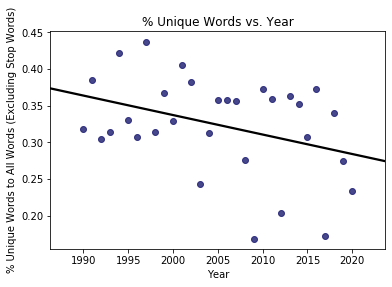

In [16]:
(sns.regplot(x='Year', y='% Unique Words to All Words (Excluding Stop Words)',data=songs_df, ci=None,
             line_kws={'color': 'black'}, scatter_kws={'color': 'midnightblue'}))
plt.title('% Unique Words vs. Year')
plt.show()

In [17]:
# calculate correlation coefficient, p-value, and standard error
years = np.asarray(songs_df['Year'])
unique_arr = np.asarray(songs_df['% Unique Words to All Words (Excluding Stop Words)'])
unique_years_lin_reg = scipy.stats.linregress(years, unique_arr)
unique_years_r = unique_years_lin_reg.rvalue
unique_years_p = unique_years_lin_reg.pvalue
unique_years_se = unique_years_lin_reg.stderr

In [18]:
# sort df to get highest song/year
unique_words_sorted = songs_df.sort_values('% Unique Words to All Words (Excluding Stop Words)', ascending=False).reset_index(drop=True)
most_unique_words_song = unique_words_sorted.iloc[0, 0]
most_unique_words_year = unique_words_sorted.iloc[0, 1]
print('Song with highest % of unique words:')
print('Title:', most_unique_words_song)
print('Year:', most_unique_words_year)

Song with highest % of unique words:
Title: "It's All About The Benjamins (Remix)"
(feat. Lil' Kim, The Lox, Notorious B.I.G.)
Year: 1997


In [19]:
# sort df to get lowest song/year
least_unique_words = songs_df.sort_values('% Unique Words to All Words (Excluding Stop Words)').reset_index(drop=True).iloc[0]
least_unique_words_song, least_unique_words_year = least_unique_words[0], least_unique_words[1]
print('Song with lowest % of unique words:')
print('Title:',least_unique_words_song)
print('Year:',least_unique_words_year)

Song with lowest % of unique words:
Title: "Lollipop"
(feat. Static Major)
Year: 2009


#### % Stop Words vs. Year<a class="anchor" id="stops-plot"></a>

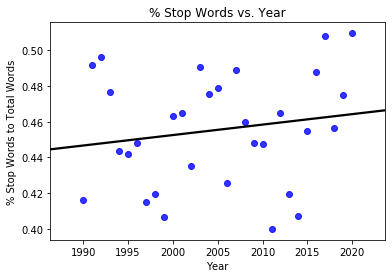

In [20]:
(sns.regplot(x='Year', y='% Stop Words to Total Words', data=songs_df, ci=None, 
             line_kws={'color': 'black'}, scatter_kws={'color': 'blue'}))
plt.title('% Stop Words vs. Year')
plt.show()

In [21]:
# calculate correlation coefficient, p-value, and standard error
stop_arr = np.asarray(songs_df['% Stop Words to Total Words'])
stop_years_lin_reg = scipy.stats.linregress(years, stop_arr)
stop_years_r = stop_years_lin_reg.rvalue
stop_years_p = stop_years_lin_reg.pvalue
stop_years_se = stop_years_lin_reg.stderr

In [22]:
# sort df to get highest/lowest song/year
stop_words_sorted = songs_df.sort_values('% Stop Words to Total Words').reset_index(drop=True)
least_stop_words_song = stop_words_sorted.iloc[0,0]
least_stop_words_year = stop_words_sorted.iloc[0,1]
stop_words_descending = stop_words_sorted.sort_values('% Stop Words to Total Words', ascending=False).reset_index(drop=True)
most_stop_words_song = stop_words_descending.iloc[0,0]
most_stop_words_year = stop_words_descending.iloc[0,1]
print('Song with lowest % of stop words:')
print('Title:', least_stop_words_song)
print('Year:', least_stop_words_year)

Song with lowest % of stop words:
Title: "Empire State Of Mind"
(feat. Alicia Keys)
Year: 2011


In [23]:
print('Song with highest % of stop words:')
print('Title:', most_stop_words_song)
print('Year:', most_stop_words_year)

Song with highest % of stop words:
Title: "a lot"
(feat. J. Cole)
Year: 2020


#### Average Syllables Per Bar vs. Year<a class="anchor" id="syllables-plot"></a>

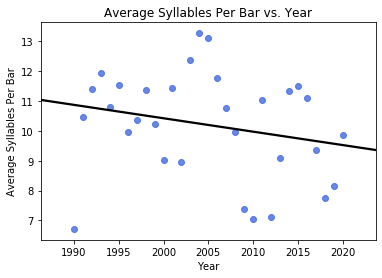

In [24]:
(sns.regplot(x='Year', y='Average Syllables Per Bar', data=songs_df, ci=None, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'royalblue'}))
plt.title('Average Syllables Per Bar vs. Year')
plt.show()

In [25]:
# calculate correlation coefficient, p-value, and standard error
syllables_arr = np.asarray(songs_df['Average Syllables Per Bar'])
syllables_years_lin_reg = scipy.stats.linregress(years, syllables_arr)
syllables_years_r = syllables_years_lin_reg.rvalue
syllables_years_p = syllables_years_lin_reg.pvalue
syllables_years_se = syllables_years_lin_reg.stderr

In [26]:
# sort df to get highest song/year
syllables_sorted = songs_df.sort_values('Average Syllables Per Bar', ascending=False).reset_index(drop=True)
most_syllables_song = syllables_sorted.iloc[0,0]
most_syllables_year = syllables_sorted.iloc[0,1]
print('Song with most syllables per bar:')
print('Title:', most_syllables_song) 
print('Year:', most_syllables_year)

Song with most syllables per bar:
Title: "Lose Yourself"
Year: 2004


In [27]:
# sort df to get lowest song/year
syllables_asc = syllables_sorted.sort_values('Average Syllables Per Bar').reset_index(drop=True)
least_syllables_song = syllables_asc.iloc[0,0]
least_syllables_year = syllables_asc.iloc[0,1]
print('Song with least syllables per bar:')
print('Title:', least_syllables_song)
print('Year:', least_syllables_year)

Song with least syllables per bar:
Title: "Mama Said Knock You Out"
Year: 1990


#### % Unique Rhymes vs Year<a class="anchor" id="rhymes-plot"></a>

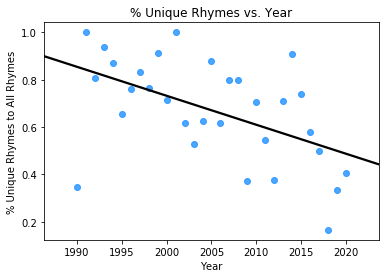

In [28]:
(sns.regplot(x='Year', y='% Unique Rhymes to All Rhymes', data=songs_df, ci=None,
            line_kws={'color': 'black'}, scatter_kws={'color': 'dodgerblue'}))
plt.title('% Unique Rhymes vs. Year')
plt.show()

In [29]:
# calculate correlation coefficient, p-value, and standard error
rhymes_arr = np.asarray(songs_df['% Unique Rhymes to All Rhymes'])
rhymes_years_lin_reg = scipy.stats.linregress(years, rhymes_arr)
rhymes_years_r = rhymes_years_lin_reg.rvalue
rhymes_years_p = rhymes_years_lin_reg.pvalue
rhymes_years_se = rhymes_years_lin_reg.stderr

In [30]:
# sort df to get highest song/year
rhymes_sorted = songs_df.sort_values('% Unique Rhymes to All Rhymes', ascending=False).reset_index(drop=True)
highest_unique_rhymes_song = rhymes_sorted.iloc[0,0]
highest_unique_rhymes_year = rhymes_sorted.iloc[0,1]
print('Song with highest % of unique rhymes:')
print('Title:', highest_unique_rhymes_song)
print('Year:', highest_unique_rhymes_year)

Song with highest % of unique rhymes:
Title: "My Mind Playin' Tricks On Me"
Year: 1991


In [31]:
# sort df to get lowest song/year
rhymes_asc = rhymes_sorted.sort_values('% Unique Rhymes to All Rhymes').reset_index(drop=True)
lowest_unique_rhymes_song = rhymes_asc.iloc[0,0]
lowest_unique_rhymes_year = rhymes_asc.iloc[0,1]
print('Song with lowest % of unique rhymes:')
print('Title:', lowest_unique_rhymes_song)
print('Year:', lowest_unique_rhymes_year)

Song with lowest % of unique rhymes:
Title: "HUMBLE."
Year: 2018


## Create Tables With Best and Worst Songs Based On the 4 Metrics<a class="anchor" id="best-worst"></a>

In [32]:
best_songs = [most_unique_words_song, least_stop_words_song, most_syllables_song,highest_unique_rhymes_song]
best_years = [most_unique_words_year, least_stop_words_year, most_syllables_year,highest_unique_rhymes_year]
best_categories = ['Highest % Unique Words', 'Lowest % Stop Words', 'Highest Average Syllables Per Bar', 'Highest % Unique Rhymes']

In [33]:
worst_songs = [least_unique_words_song, most_stop_words_song, least_syllables_song, lowest_unique_rhymes_song]
worst_years = [least_unique_words_year, most_stop_words_year, least_syllables_year, lowest_unique_rhymes_year]
worst_categories = ['Lowest % Unique Words', 'Highest % Stop Words', 'Lowest Average Syllables Per Bar', 'Lowest % Unique Rhymes']

In [34]:
# replace the linebreaks in the song titles
for i in range(len(best_songs)):
    b = best_songs[i]
    w = worst_songs[i]
    b = b.replace('\n', ' ')
    w = w.replace('\n', ' ')
    best_songs[i] = b
    worst_songs[i] = w

In [35]:
# create the dfs, one for the songs that were best in each metric, one for songs that were worst
best_songs_df = pd.DataFrame(data={'Category':best_categories, 'Song Title':best_songs, 'Year':best_years})
worst_songs_df = pd.DataFrame(data={'Category':worst_categories, 'Song Title':worst_songs, 'Year':worst_years})

In [36]:
best_songs_df

,Category,Song Title,Year
0,Highest % Unique Words,"""It's All About The Benjamins (Remix)"" (feat. ...",1997
1,Lowest % Stop Words,"""Empire State Of Mind"" (feat. Alicia Keys)",2011
2,Highest Average Syllables Per Bar,"""Lose Yourself""",2004
3,Highest % Unique Rhymes,"""My Mind Playin' Tricks On Me""",1991


In [37]:
worst_songs_df

,Category,Song Title,Year
0,Lowest % Unique Words,"""Lollipop"" (feat. Static Major)",2009
1,Highest % Stop Words,"""a lot"" (feat. J. Cole)",2020
2,Lowest Average Syllables Per Bar,"""Mama Said Knock You Out""",1990
3,Lowest % Unique Rhymes,"""HUMBLE.""",2018


### Calculate The Statistics To Determine Which Metrics Are Most Meaningful<a class="anchor" id="statistics"></a>

* Null hypothesis: Rap songs made in the 21st century are not worse than rap songs made in the 90's.
* Alternative hypothesis: Rap songs made in the 21st century are worse than rap songs made in the 90's.
* Alpha value: 0.05

In [38]:
r_values = [unique_years_r, stop_years_r, syllables_years_r, rhymes_years_r]
p_values = [unique_years_p, stop_years_p, syllables_years_p, rhymes_years_p]
se_values = [unique_years_se, stop_years_se, syllables_years_se, rhymes_years_se]
statistic_names = ['Correlation Coefficient', 'P-Value', 'Standard Error']
metric_names = ['% Unique Words to All Words (Excluding Stop Words)', '% Stop Words to Total Words', 
               'Average Syllables Per Bar','% Unique Rhymes to All Rhymes']

In [39]:
# create df for each statistic for each metric
statistics_df = pd.DataFrame(data={'Metric':metric_names, statistic_names[0]:r_values, statistic_names[1]:p_values, statistic_names[2]:se_values})

In [40]:
statistics_df = statistics_df.sort_values('P-Value').reset_index(drop=True)
statistics_df

,Metric,Correlation Coefficient,P-Value,Standard Error
0,% Unique Rhymes to All Rhymes,-0.516433,0.002937,0.003769
1,% Unique Words to All Words (Excluding Stop Wo...,-0.364302,0.043922,0.001261
2,Average Syllables Per Bar,-0.230123,0.212980,0.035283
3,% Stop Words to Total Words,0.169811,0.361098,0.000632


# Conclusion<a class="anchor" id="conclusion"></a>

According to the above statistics, the most statistically significant metric, as well as the one with the highest correlation, is **% Unique Rhymes to All Rhymes**. The only other statistically significant metric, which also has the second best correlation, is **% Unique Words to All Words (Excluding Stop Words)**.

Based on these statistically significant metrics, it does appear the hip-hop has in fact gotten worse over the years, as far as unique rhymes and words go. The data seems to show a negative trend in the quality of lyrics in mainstream rap songs. 

Personally, I don't think this apparent negative trend indicates that rappers today have worse skills or artistry. Instead, I believe as hip-hop has grown to become [the most popular genre of music](https://www.usatoday.com/story/life/music/2018/01/03/rap-overtakes-rock-most-popular-genre-among-music-fans-heres-why/990873001/), it has become, over time, increasingly more commercialized and marketed. With this shift comes more and more hip-hop songs being circulated and more songs with lower lyrical complexity, which appeal to younger and/or more general audiences. 

All in all, this data and analysis demonstrate the potential negative effects of growing popularity and commericialization of the hip-hop music genre on the quality of music. With the continuing increase of rap music sales, more prevalent commerical use of rap songs, and broadening access to music for consumers' (especially those of younger demographics), it is no mystery as to why this negative trend in lyrical complexity is observed. 

But, as rap ages as a genre and becomes more popular and accessible, not only in the United States but worldwide, the amount of lyrically intricate and skillfully made rap songs will only grow. While finding such songs may be harder as the number of rappers and rap songs increase, it may also become easier as access to music and media increases everywhere. 